# Explanatory Analysis

We are using 2011 nationwide data of patients discharged from drug treatment programs (either through completion of the program or by dropping out). The goal is to analyse some of the attributes of the patient or their circumstances to see if they may have osme impact on the outcome of whether the patient completes treatment or drops out against professional advice.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_table('Discharge_Data.tsv')

In [3]:
# subset data for our analysis to only rows where REASON for discharge was either-
# 1: Treatment Completed or 
# 2: Left Against Professional Advice

df = df_raw.loc[df_raw['REASON'].isin([1,2])]

In [4]:
df.head()
# since all the data points are integers, we need to map them to their values

,CASEID,DISYR,AGE,GENDER,RACE,ETHNIC,MARSTAT,EDUC,EMPLOY,DETNLF,...,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,ALCDRUG,DSMCRIT,PSYPROB,HLTHINS,PRIMPAY
2,3,2011,11,1,5,5,3,4,4,3,...,0,0,0,0,0,3,13,2,-9,9
3,4,2011,6,2,5,5,3,4,3,-9,...,0,0,0,0,0,2,-9,1,4,5
4,5,2011,9,2,5,5,4,3,1,-9,...,0,0,0,0,0,1,9,1,4,5
5,6,2011,5,1,4,5,1,4,4,6,...,0,0,0,0,0,2,-9,2,4,8
6,7,2011,6,1,5,5,1,3,2,-9,...,0,0,0,0,0,2,7,2,-9,1


In [22]:
# Since -9 represents NA/mising values in the dataset, map to NaN for easier reading and computation with pandas/numpy
df = df.replace(-9, np.nan)

In [6]:
# see which variables have the least missing values, to help narrow down the scope of usable attributes in the model
df.count().sort_values(ascending = False)
# most do not have missing values, or have an insignificant amount. 

CASEID      1207724
HALLFLG     1207724
REASON      1207724
DIVISION    1207724
REGION      1207724
STFIPS      1207724
NUMSUBS     1207724
IDU         1207724
ALCFLG      1207724
COKEFLG     1207724
MARFLG      1207724
HERFLG      1207724
METHFLG     1207724
OPSYNFLG    1207724
PCPFLG      1207724
MTHAMFLG    1207724
SEDHPFLG    1207724
DISYR       1207724
AGE         1207724
ALCDRUG     1207724
OTHERFLG    1207724
OTCFLG      1207724
INHFLG      1207724
BARBFLG     1207724
TRNQFLG     1207724
BENZFLG     1207724
STIMFLG     1207724
AMPHFLG     1207724
LOS         1207723
GENDER      1207505
             ...   
ROUTE1      1194367
FREQ1       1191045
PSOURCE     1188851
LIVARAG     1184409
FRSTUSE1    1181339
EDUC        1180332
EMPLOY      1180140
METHUSE     1169860
ARRESTS     1100664
NOPRIOR     1084846
VET         1062131
SUB3        1056599
MARSTAT      936837
CBSA         911266
PMSA         911266
PSYPROB      873931
PRIMINC      788493
ROUTE2       664455
FRSTUSE2     661637


Create a dictionary for some of the variables to use:

Variable | Description | Type of Variable
---| ---| ---
AGE | Age (ranges), from 11 and under to 55+ | categorical
GENDER | 1 = Male, 2 = Female | categorical
EDUC | Years of Education (ranges), from 8 and less to 16+ | categorical
EMPLOY | Employment Status: FT, PT, Unemployed, Not in Labour Force | categorical
LIVARAG | Living Arrangement: Homeless, Independent, Dependent | categorical
LOS | Length of Stay, # of days til 30 (after 30, ranges: 31 = 31-45 days, 32 = 46=60 days, etc.) | continuous/categorical 
PSOURCE | Primary Source of Referral | categorical
NOPRIOR | # of Prior Treatment Episodes | continuous
NUMSUBS | Number of Substances | continous
SUB1 | Primary Substance of Abuse | categorical
REASON | 1 = Treatment Completed , 2 = Dropped Out | categorical

In [23]:
# select variables
df = df[['AGE', 'GENDER', 'EDUC', 'EMPLOY', 'LIVARAG', 'LOS', 'PSOURCE', 'NOPRIOR', 'NUMSUBS', 'SUB1', 'REASON']].dropna()

# created version with mapped variables for easier comprehension, use unmapped version for charting ordinal variables
df_mapped = df.copy()

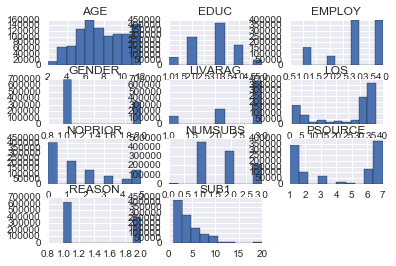

In [8]:
# take a quick look at distributions of chosen variables - note despite all being categorical some are ordinal such as
# AGE, EDUC, LOS (Length of Stay), NOPRIOR (Number of Prior Treatments), NUMSUBS (Number of Substances)
df.hist();

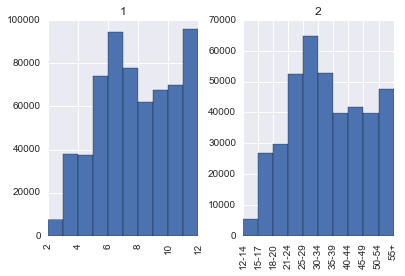

In [9]:
# to examine AGE more closely (1 = Completed Treatment, 2 = Dropped Out)
df['AGE'].hist(by = df['REASON']);
plt.xticks([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
           ['12-14', '15-17', '18-20', '21-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55+']);

At first glance the distribution actually looks pretty similar for each age group, with the exception of the older patients (especially in the 55+), which had significantly more completed treatments. We can also look to a table to confirm:

In [10]:
# mapping age ranges
AGE_Map = {1: '11 and Under',
           2: '12 to 14',
           3: '15 to 17',
           4: '18 to 20',
           5: '21 to 23',
           6: '25 to 29',
           7: '30 to 34',
           8: '35 to 39',
           9: '40 to 44',
           10: '45 to 49',
           11: '50 to 54',
           12: '55+'}

df_mapped['AGE'].replace(AGE_Map, inplace = True)

In [11]:
pd.crosstab(index = df_mapped['AGE'], columns = df_mapped['REASON'], normalize = 'index', margins = True)

REASON,1,2
AGE,,
12 to 14,0.576852,0.423148
15 to 17,0.585739,0.414261
18 to 20,0.556035,0.443965
21 to 23,0.585274,0.414726
25 to 29,0.592792,0.407208
30 to 34,0.596054,0.403946
35 to 39,0.607492,0.392508
40 to 44,0.618199,0.381801
45 to 49,0.637033,0.362967


It looks like there is a downward trend in those dropping out of the program as the age range increases, so it could age could be an indicative variable in our model. We can further analyse this in conjunction with gender:

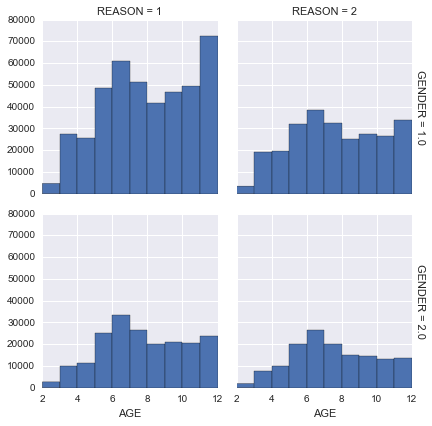

In [13]:
# Reason = 1: Completed Treatment, Reason = 2: Dropped Out
# Gender = 1: Male, Gender = 2: Female
g = sns.FacetGrid(df, row = 'GENDER', col = 'REASON', margin_titles = True)
g.map(plt.hist, 'AGE');

The majority of those who finish treatment are men older than 55+. Once again it looks like the distributions seem similar at first glance.

# MAPPING REST OF VARIABLES

In [24]:
# mapping age ranges
AGE_Map = {1: '11 and Under',
           2: '12 to 14',
           3: '15 to 17',
           4: '18 to 20',
           5: '21 to 23',
           6: '25 to 29',
           7: '30 to 34',
           8: '35 to 39',
           9: '40 to 44',
           10: '45 to 49',
           11: '50 to 54',
           12: '55+'}

df_mapped['AGE'].replace(AGE_Map, inplace = True)

In [25]:
# mapping gender
GENDER_Map = {1: 'Male',
              2: 'Female'}
df_mapped['GENDER'].replace(GENDER_Map, inplace = True)

In [26]:
pd.crosstab(index = df_mapped['GENDER'], columns = df_mapped['REASON'], normalize = 'index', margins = True)

REASON,1,2
GENDER,,
Female,0.576324,0.423676
Male,0.624702,0.375298
All,0.608772,0.391228


Of the genders, females were less likely to complete treatment.

In [27]:
# mapping education
EDUC_Map = {1: '8 Years or Less',
            2: '9 to 11',
            3: '12',
            4: '13 to 15',
            5: '16 or More'}
df_mapped['EDUC'].replace(EDUC_Map, inplace = True)

In [28]:
pd.crosstab(index = df_mapped['EDUC'], columns = df_mapped['REASON'], normalize = 'index', margins = True)

REASON,1,2
EDUC,,
12,0.621556,0.378444
13 to 15,0.645228,0.354772
16 or More,0.708716,0.291284
8 Years or Less,0.576985,0.423015
9 to 11,0.552780,0.447220
All,0.608772,0.391228


As expected those with more years of education were more likely to complete treatment. However it is important to know there might be some multicollinearity between the age ranges and education.

In [29]:
# mapping employment status
EMPLOY_Map = {1: 'Full Time',
              2: 'Part Time',
              3: 'Unemployed',
              4: 'Not in Labour Force'}
df_mapped['EMPLOY'].replace(EMPLOY_Map, inplace = True)

In [30]:
pd.crosstab(index = df_mapped['EMPLOY'], columns = df_mapped['REASON'], normalize = 'index', margins = True)

REASON,1,2
EMPLOY,,
Full Time,0.695363,0.304637
Not in Labour Force,0.600259,0.399741
Part Time,0.622765,0.377235
Unemployed,0.580376,0.419624
All,0.608772,0.391228


Those working FT were more likely to complete treatment, probably as they had the most to lose or if their treatment was employer directed.

In [31]:
# mapping living arrangement status
LIVARAG_Map = {1: 'Homeless',
               2: 'Dependent',
               3: 'Independent'}
df_mapped['LIVARAG'].replace(LIVARAG_Map, inplace = True)

In [32]:
pd.crosstab(index = df_mapped['LIVARAG'], columns = df_mapped['REASON'], normalize = 'index', margins = True)

REASON,1,2
LIVARAG,,
Dependent,0.618370,0.381630
Homeless,0.640164,0.359836
Independent,0.599403,0.400597
All,0.608772,0.391228


In [33]:
# mapping principal source of referral
PSOURCE_Map = {1: 'Individual',
               2: 'Drug Abuse Provider',
               3: 'Other Health Provider',
               4: 'School',
               5: 'Employer',
               6: 'Other Community Referral',
               7: 'Court'}
df_mapped['PSOURCE'].replace(PSOURCE_Map, inplace = True)

In [34]:
pd.crosstab(index = df_mapped['PSOURCE'], columns = df_mapped['REASON'], normalize = 'index', margins = True)

REASON,1,2
PSOURCE,,
Court,0.681665,0.318335
Drug Abuse Provider,0.618087,0.381913
Employer,0.715962,0.284038
Individual,0.544160,0.455840
Other Community Referral,0.576554,0.423446
Other Health Provider,0.583779,0.416221
School,0.507817,0.492183
All,0.608772,0.391228


Interesting to see that those who checked themselves in had the lowest rate of treatment completion.

In [35]:
# mapping primary drug used - since there are 20 unique categories, take the 6 most common and code the rest as 'Other'
df_mapped['SUB1'].value_counts(ascending = False)

2.0     415986
4.0     194717
5.0     143348
7.0      81976
3.0      81417
10.0     70587
13.0      8517
20.0      6876
1.0       5412
11.0      4852
8.0       3114
6.0       2996
16.0      1369
9.0        959
18.0       693
17.0       683
12.0       662
15.0       502
14.0       230
Name: SUB1, dtype: int64

In [36]:
# mapping substances
SUB1_Map = {2: 'Alcohol',
            3: 'Crack Cocaine',
            4: 'Marijuana',
            5: 'Heroine',
            7: 'Opiates Synthetics',
            10: 'Meth'}
df_mapped['SUB1'].replace(SUB1_Map, inplace = True)
df_mapped['SUB1'] = np.where(df.SUB1.isin([1,6,8,9,11,12,13,14,15,16,17,18,18,20]), 'Other', df_mapped['SUB1'])

In [37]:
pd.crosstab(index = df_mapped['SUB1'], columns = df_mapped['REASON'], normalize = 'index', margins = True)

REASON,1,2
SUB1,,
Alcohol,0.694019,0.305981
Crack Cocaine,0.548841,0.451159
Heroine,0.517238,0.482762
Marijuana,0.554970,0.445030
Meth,0.605239,0.394761
Opiates Synthetics,0.541561,0.458439
Other,0.575532,0.424468
All,0.608772,0.391228


In [38]:
df_mapped.head()

,AGE,GENDER,EDUC,EMPLOY,LIVARAG,LOS,PSOURCE,NOPRIOR,NUMSUBS,SUB1,REASON
3,25 to 29,Female,13 to 15,Unemployed,Independent,32.0,Individual,1.0,2,Opiates Synthetics,2
4,40 to 44,Female,12,Full Time,Independent,27.0,Other Community Referral,3.0,1,Alcohol,1
6,25 to 29,Male,12,Part Time,Independent,35.0,Court,2.0,1,Marijuana,1
7,25 to 29,Male,13 to 15,Not in Labour Force,Homeless,1.0,Individual,5.0,2,Heroine,2
8,35 to 39,Male,16 or More,Full Time,Independent,36.0,Individual,3.0,2,Meth,1


In [ ]:
# look at data types
df_mapped.dtypes